In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def time_series_integration(runid, log_files, ms_files):
    '''This is a function used to quickly integrate under specific mass fragments over time normalized over carrier gas.
    RunID = Run Name
    log_files = Log of each of the steps
    ms_files = Time series data of mass spec peaks
    '''
    
    
    
    # Reads the endpoints of each step
    df_avg = pd.read_csv(log_files,
                     error_bad_lines=False, parse_dates = True)
    
    # Mass Spec data
    df_ms = pd.read_csv(ms_files, parse_dates = True)
    
    ## Convert from object to datetime
    df_avg['Time'] = pd.to_datetime(df_avg['Time'])
    ## Convert to Unix Date Time
    df_avg['Time'] = df_avg['Time'].astype('int64')//1e9
    
    df_ms['Time'] = pd.to_datetime(df_ms['Time'])
    df_ms['Time'] = df_ms['Time'].astype('int64')//1e9
    
    # Make empty column to input areas later
    df_avg['Area H2O/N2'] = np.nan
    
    # Compute areas
    start = int(df_avg.ix[0,['Time']])
    count = 0
    for row in df_avg.itertuples():
        end = row[1]
        Water = df_ms.loc[(df_ms['Time'] > start) & (df_ms['Time'] < end)]
        area = np.trapz(np.divide(Water['Mass 18'], Water['Mass 28']), Water['Time'])
        df_avg.loc[count, runid +' Area H2O/N2'] = area
        count += 1
        start = row[1]
    
    return df_avg[['Cycle','Step', runid + ' Area H2O/N2']]

In [3]:
file_list = os.listdir()
file_list

['.ipynb_checkpoints', 'IntCode.ipynb', 'Run 1 Cycles.csv', 'Time Stamps.csv']

In [4]:
runid = 'Run 1'

log_files = file_list[3]
ms_files = file_list[2]

Run1 = time_series_integration(runid, log_files, ms_files)
Run1.head()

,Cycle,Step,Run 1 Area H2O/N2
0,0.0,Standby,0.000000
1,1.0,Dose1,66.346972
2,1.0,Purge 1,8.514957
3,1.0,Dose 2,0.000000
4,1.0,Purge 2,-2.617728


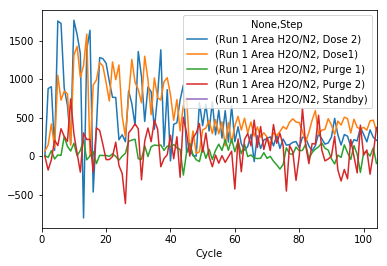

In [36]:
##Compare different steps to their integrated peaks.

Run1.pivot(index = 'Cycle', columns = 'Step').plot()